In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train/freshbanana/vertical_flip_Screen Shot 2018-06-12 at 9.38.38 PM.png
/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train/freshbanana/vertical_flip_Screen Shot 2018-06-12 at 9.39.47 PM.png
/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train/freshbanana/vertical_flip_Screen Shot 2018-06-12 at 9.45.15 PM.png
/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train/freshbanana/vertical_flip_Screen Shot 2018-06-12 at 10.07.21 PM.png
/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train/freshbanana/vertical_flip_Screen Shot 2018-06-12 at 9.38.29 PM.png
/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train/freshbanana/translation_Screen Shot 2018-06-12 at 9.57.42 PM.png
/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train/fr

In [3]:
# Importing libraries
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [4]:
# Getting labels of training data
labels = os.listdir('/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train')
labels

['rottenoranges',
 'rottenapples',
 'rottenbanana',
 'freshoranges',
 'freshbanana',
 'freshapples']

In [5]:
# for displaying images
from IPython.display import display, Image


 ROTTENORANGES


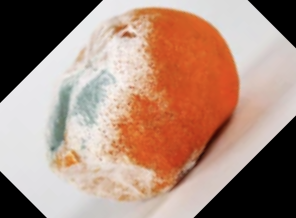

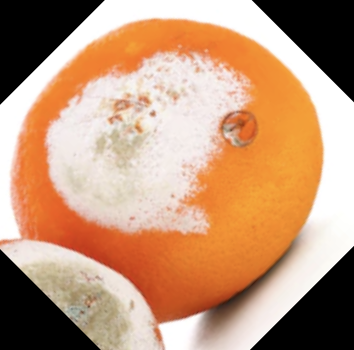

there are  1595  images in  rottenoranges class

 ROTTENAPPLES


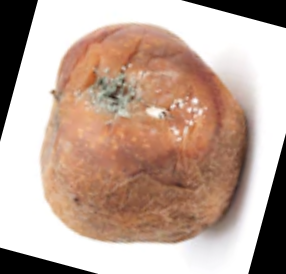

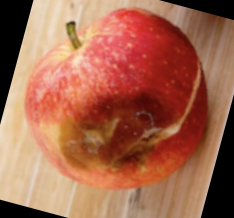

there are  2342  images in  rottenapples class

 ROTTENBANANA


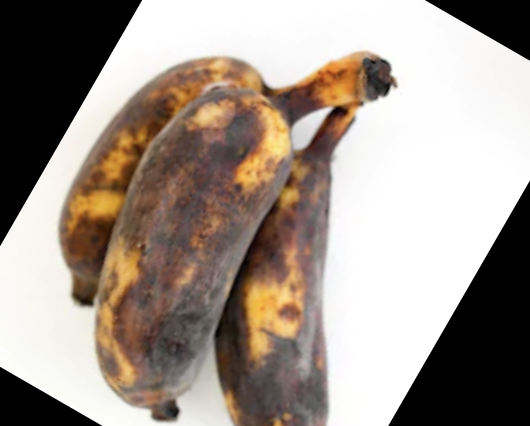

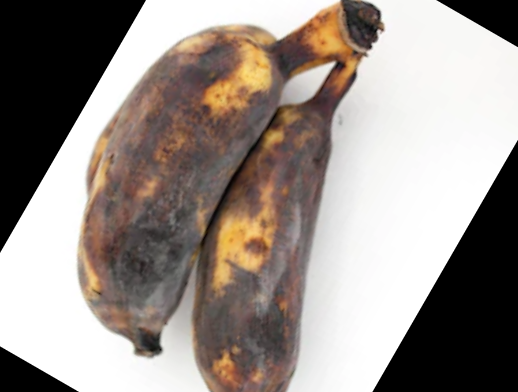

there are  2224  images in  rottenbanana class

 FRESHORANGES


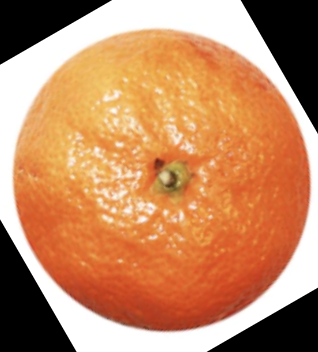

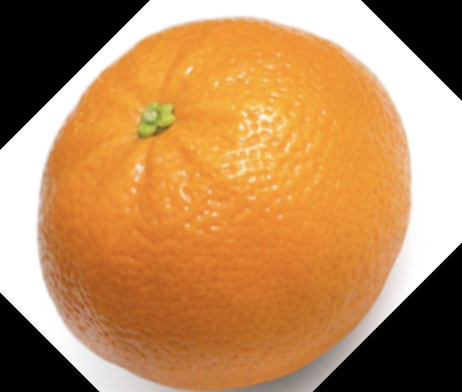

there are  1466  images in  freshoranges class

 FRESHBANANA


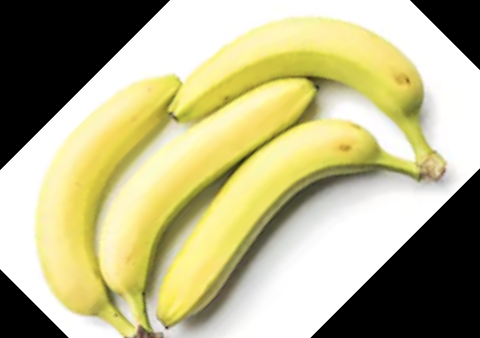

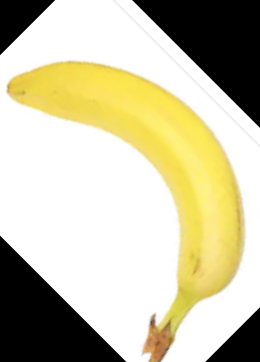

there are  1581  images in  freshbanana class

 FRESHAPPLES


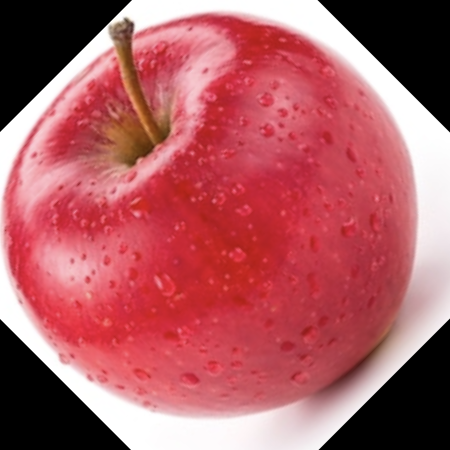

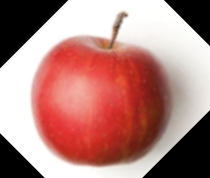

there are  1693  images in  freshapples class


In [6]:
num = []

for i in labels:
  path = '/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', i, 'class')

In [7]:
# getting images from files using ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

tg = datagen.flow_from_directory(directory='/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='training')
vg = datagen.flow_from_directory(directory='/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='validation')

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.


In [8]:
# building CNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (20,20,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [9]:
# compiling model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
# runing model
history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=8, validation_data=vg, validation_steps=len(vg))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/8
349/349 [==============================] - 198s 568ms/step - loss: 0.4488 - accuracy: 0.8419 - val_loss: 0.3537 - val_accuracy: 0.8760
Epoch 2/8
349/349 [==============================] - 64s 183ms/step - loss: 0.3452 - accuracy: 0.8816 - val_loss: 0.2968 - val_accuracy: 0.8916
Epoch 3/8
349/349 [==============================] - 66s 188ms/step - loss: 0.2944 - accuracy: 0.8964 - val_loss: 0.2831 - val_accuracy: 0.8939
Epoch 4/8
349/349 [==============================] - 65s 186ms/step - loss: 0.2455 - accuracy: 0.9090 - val_loss: 0.2990 - val_accuracy: 0.8912
Epoch 5/8
349/349 [==============================] - 63s 180ms/step - loss: 0.2176 - accuracy: 0.9195 - val_loss: 0.1694 - val_accuracy: 0.9394
Epoch 6/8
349/349 [==============================] - 63s 180ms/step - loss: 0.1941 - accuracy: 0.9324 - val_loss: 0.1783 - val_accuracy: 0.9339
Epoch 7/8
349/349 [==============================] - 63s 181ms/step - loss: 0.1641 - accuracy: 0.9378 - val_loss: 0.2415 - val_accuracy

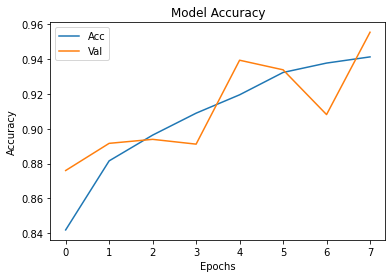

In [12]:
#curves 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

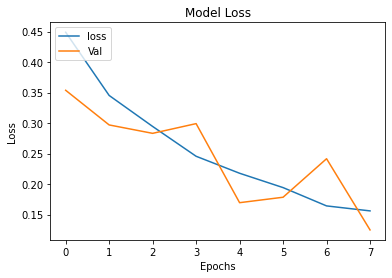

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')